### Initial Setup

In [1]:
#Importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statsmodels api
import statsmodels.api as sm
from scipy import stats

#Importing sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Importing 'warnings' to ignore future warnings and Data conversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

#Displaying all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
X = pd.read_csv('../data/Features_1_T.csv')
y = pd.read_csv('../data/Target.csv')

In [3]:
#Visualising Features from data preprocessing stage
X.head()

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,new_inc_rate,binnedInc_encoded
0,1.299664,1.490721,1.236695,1.516071,-0.889667,1.406097,-0.130471,-0.515803,-0.091599,0.143559,0.106115,-0.831022,0.490987,0.159380,-1.655696,1.186128,-0.270958,0.041232,1.014166,0.000000,0.047120,-0.435643,-0.862388,-0.111935,0.052112,1.720301,0.662976,0.249813,0.240832,0.779439,1.569657
1,-0.044367,0.016828,0.093408,0.244856,0.262219,1.147637,-0.272083,-1.414303,-1.607887,-0.326981,-1.057089,-1.497645,-1.388514,0.291046,-1.256602,1.764599,0.210180,-0.016727,0.553813,0.600370,0.259042,-0.665335,-0.649796,0.343596,-0.603797,1.230763,1.191805,-0.897719,-0.651534,-0.699024,0.527738
2,-0.431605,-0.241177,0.194777,-0.266578,-0.360422,1.235420,-0.002346,0.841505,0.685498,0.331775,0.353296,0.712089,0.172242,0.729936,-0.829002,0.514355,-0.992664,-0.248561,-0.056860,-0.539035,-0.662815,0.738338,0.298691,0.447185,-0.772081,-0.177067,0.973012,0.493438,-0.953168,-1.836304,0.527738
3,0.569934,0.836045,-0.229047,0.642956,0.028729,1.386346,-0.051798,0.497399,0.230612,0.096505,0.135195,0.242983,0.677838,-0.806177,-0.458416,-0.735888,-0.703982,1.229380,-0.554793,-0.893025,-0.652219,1.146679,0.936466,0.497490,-0.737775,0.680441,0.411927,-0.031499,-0.516237,-0.357840,-0.166875
4,-0.885722,-0.737131,0.245171,-0.770839,-0.687309,-0.755287,0.071831,1.567952,1.273060,-0.326981,0.876737,-0.411296,0.875681,-0.915899,-0.201856,0.327752,-0.716010,-0.886104,-0.254154,-0.494786,-0.641623,0.980790,0.560342,0.641791,-1.278252,0.157883,-0.445082,0.429433,0.579555,-1.836304,0.527738


In [4]:
#Features Summary
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2895 non-null   float64
 1   avgDeathsPerYear         2895 non-null   float64
 2   medIncome                2895 non-null   float64
 3   popEst2015               2895 non-null   float64
 4   povertyPercent           2895 non-null   float64
 5   studyPerCap              2895 non-null   float64
 6   MedianAge                2895 non-null   float64
 7   MedianAgeMale            2895 non-null   float64
 8   MedianAgeFemale          2895 non-null   float64
 9   AvgHouseholdSize         2895 non-null   float64
 10  PercentMarried           2895 non-null   float64
 11  PctNoHS18_24             2895 non-null   float64
 12  PctHS18_24               2895 non-null   float64
 13  PctBachDeg18_24          2895 non-null   float64
 14  PctHS25_Over            

In [5]:
#Visualising target (Annual mean per capita (100,000) cancer mortalities)
print(y.shape)
y.head()

(2895, 1)


,annual_death_rate
0,28
1,27
2,30
3,33
4,25


### Data Splitting

In [6]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

### Regression Analysis of significance: Stats models Linear Regression (OLS Regression)

In [7]:
# Add a constant column and fit the linear regression model
X_train_with_const = sm.add_constant(X_train)  # Add a constant column
ols = sm.OLS(y_train, X_train_with_const)
ols_results = ols.fit()

# Print the model summary with original variable names
# print(ols_results.summary(xname=['Constant'] + list(X_train.columns)))
print(ols_results.summary(list(X_train.columns)))

                                                                                                                                                                                                                                                                                                          OLS Regression Results                                                                                                                                                                                                                                                                                                          
Dep. Variable:     ['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone'

* Regarding Condition Number (Cond. No): The low scale value indicates that the predictions could be correctly estimated.
* Variable estimates or coefficients highlight an evenly distribution of importance for each feature, highlighting PctBachDeg25_Over, PctPublicCoverageAlone and PctPrivateCoverage as the high magnitude variables.
* An analysis of p-values indicates statistical significance on the majority of features. Notably, medIncome and PctEmployed16_Over presented lower statistical significance for the model predictions leading to a correspondent low coefficient. These features could be deleted in order to find improvement on model metrics.


#### Residuals Analysis

<Axes: xlabel='Residuals', ylabel='Count'>

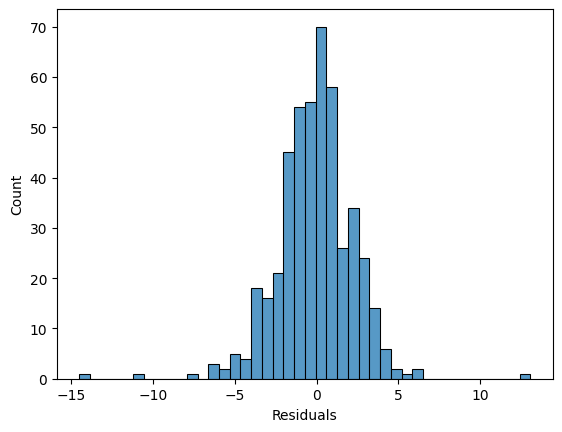

In [8]:
X_val_with_const = sm.add_constant(X_val)  # Add a constant column to the validation dataset
y_fitted = ols_results.predict(X_val_with_const)

resid = y_val['annual_death_rate'] - y_fitted
sns.histplot(pd.DataFrame(resid, columns=['Residuals'])['Residuals'])



* Residuals analysis showcase a normal distribution with some outliers, indicating acceptable performance but gap for improvement.

#### Removing Less significant features from p-value Analysis

In [9]:
less_significant_features = ['PctMarriedHouseholds', 'povertyPercent', 'PctWhite', 'PctEmpPrivCoverage',
                              'PctHS25_Over', 'PctBachDeg18_24', 'PctNoHS18_24',
                              'PercentMarried', 'AvgHouseholdSize', 'MedianAgeMale',
                              'MedianAge']

X = X.drop(less_significant_features, axis=1)

#Displaying the first 5 rows of the dataset after selecting the features
X.head()

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,studyPerCap,MedianAgeFemale,PctHS18_24,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctPublicCoverage,PctPublicCoverageAlone,PctBlack,PctAsian,PctOtherRace,BirthRate,new_inc_rate,binnedInc_encoded
0,1.299664,1.490721,1.236695,1.516071,1.406097,-0.091599,0.490987,1.186128,-0.270958,0.041232,1.014166,0.000000,-0.435643,-0.862388,0.052112,1.720301,0.662976,0.240832,0.779439,1.569657
1,-0.044367,0.016828,0.093408,0.244856,1.147637,-1.607887,-1.388514,1.764599,0.210180,-0.016727,0.553813,0.600370,-0.665335,-0.649796,-0.603797,1.230763,1.191805,-0.651534,-0.699024,0.527738
2,-0.431605,-0.241177,0.194777,-0.266578,1.235420,0.685498,0.172242,0.514355,-0.992664,-0.248561,-0.056860,-0.539035,0.738338,0.298691,-0.772081,-0.177067,0.973012,-0.953168,-1.836304,0.527738
3,0.569934,0.836045,-0.229047,0.642956,1.386346,0.230612,0.677838,-0.735888,-0.703982,1.229380,-0.554793,-0.893025,1.146679,0.936466,-0.737775,0.680441,0.411927,-0.516237,-0.357840,-0.166875
4,-0.885722,-0.737131,0.245171,-0.770839,-0.755287,1.273060,0.875681,0.327752,-0.716010,-0.886104,-0.254154,-0.494786,0.980790,0.560342,-1.278252,0.157883,-0.445082,0.579555,-1.836304,0.527738


### Model Approach 1: Sklearn Linear Regression

In [10]:
sns.set_theme(style="white")

# Function to plot predictions vs actual values
def plot_predictions_vs_actual(y_true, y_pred, title):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='skyblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='orange', linestyle='-')  # Diagonal line
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.xlim(y_true.min() - 1, y_true.max() + 1)  # Set limits
    plt.ylim(y_true.min() - 1, y_true.max() + 1)  # Set limits
    plt.grid(False)
    plt.show()

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
val_preds = lr.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

train RMSE: 2.2548488215680282
train R²: 0.7607260453514287
Validation RMSE: 2.3435580205343154
Validation R²: 0.7183108040919468


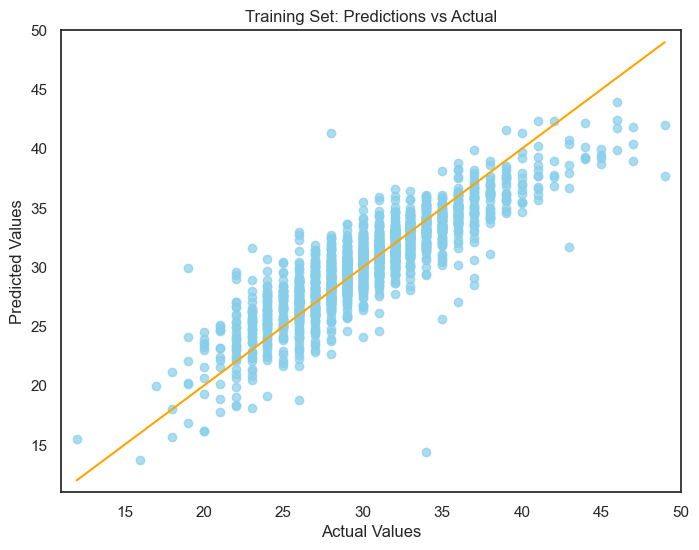

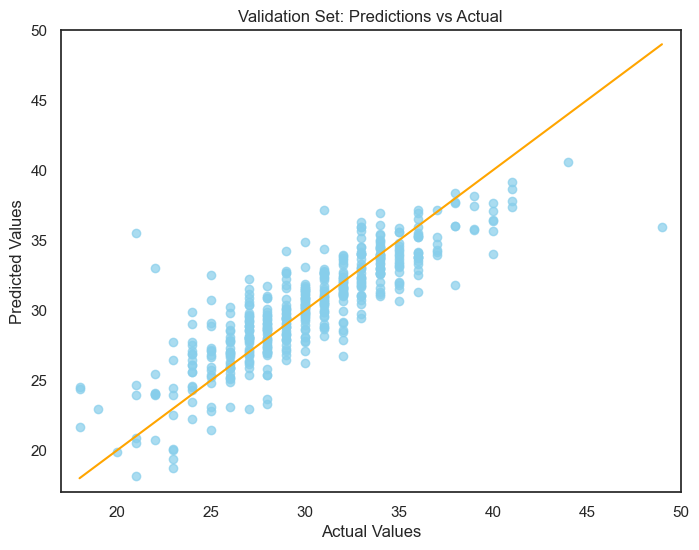

In [12]:
plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

In [13]:
from sklearn.linear_model import Lasso

hyperparameter_set = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5]

models = []
for hyperparam in hyperparameter_set:
    models.append(Lasso(alpha=hyperparam))  

results = []
for model in models:
    model.fit(X_train, y_train)
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    results.append({
        'alpha': model.alpha,
        'Training RMSE': rmse(y_train, training_preds),
        'Validation RMSE': rmse(y_val, val_preds),
        'Training R²': r2_score(y_train, train_preds),
        'Validation R²': r2_score(y_val, val_preds),
    })

df_results = pd.DataFrame(results, columns=['alpha', 'Training RMSE', 'Validation RMSE', 'Training R²', 'Validation R²'])

df_results

,alpha,Training RMSE,Validation RMSE,Training R²,Validation R²
0,0.001,2.254997,2.341592,0.760726,0.718783
1,0.010,2.268170,2.340498,0.760726,0.719046
2,0.100,3.115891,3.176744,0.760726,0.482413
3,0.500,3.440870,3.439620,0.760726,0.393208
4,1.000,3.698444,3.632493,0.760726,0.323250
5,1.500,4.056315,3.926359,0.760726,0.209324
6,2.000,4.491465,4.305495,0.760726,0.049253
7,2.500,4.609669,4.417939,0.760726,-0.001055
8,5.000,4.609669,4.417939,0.760726,-0.001055


In [14]:
from sklearn.linear_model import Ridge

hyperparameter_set = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5]

models = []
for hyperparam in hyperparameter_set:
    models.append(Ridge(alpha=hyperparam))  

results = []
for model in models:
    model.fit(X_train, y_train)
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    results.append({
        'alpha': model.alpha,
        'Training RMSE': rmse(y_train, training_preds),
        'Validation RMSE': rmse(y_val, val_preds),
        'Training R²': r2_score(y_train, train_preds),
        'Validation R²': r2_score(y_val, val_preds),
    })

df_results = pd.DataFrame(results, columns=['alpha', 'Training RMSE', 'Validation RMSE', 'Training R²', 'Validation R²'])

df_results


,alpha,Training RMSE,Validation RMSE,Training R²,Validation R²
0,0.001,2.254849,2.343548,0.760726,0.718313
1,0.010,2.254850,2.343464,0.760726,0.718333
2,0.100,2.255005,2.342779,0.760726,0.718498
3,0.500,2.258409,2.342921,0.760726,0.718464
4,1.000,2.267578,2.348930,0.760726,0.717018
5,1.500,2.280578,2.359573,0.760726,0.714448
6,2.000,2.296131,2.373393,0.760726,0.711093
7,2.500,2.313319,2.389331,0.760726,0.707200
8,5.000,2.406235,2.480182,0.760726,0.684510


* Linear Regression models show consistency between training and validation, achieving acceptable results on RMSE.
* Regularisation techniques over Linear regression (L1 and L2) have not improved the performance metrics throughout the different parameter configuration set.

### Model Approach 2: KNNRegressor

train RMSE: 2.8226674270780983
train R²: 0.6250442726149257
Validation RMSE: 3.5210818282708667
Validation R²: 0.3641260902253489


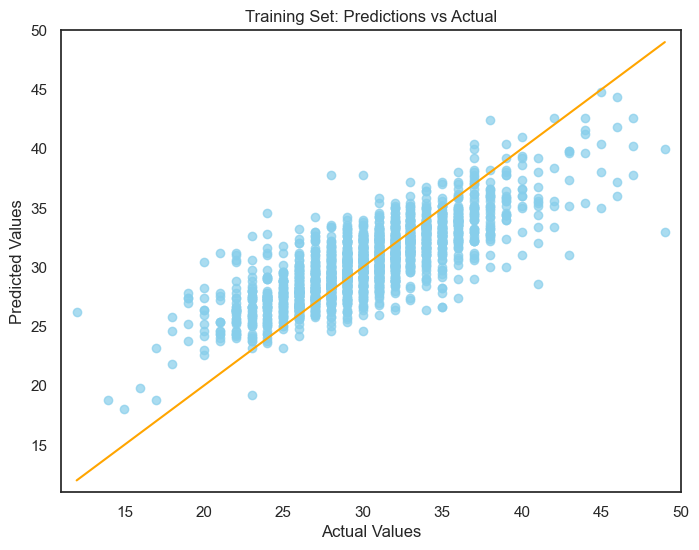

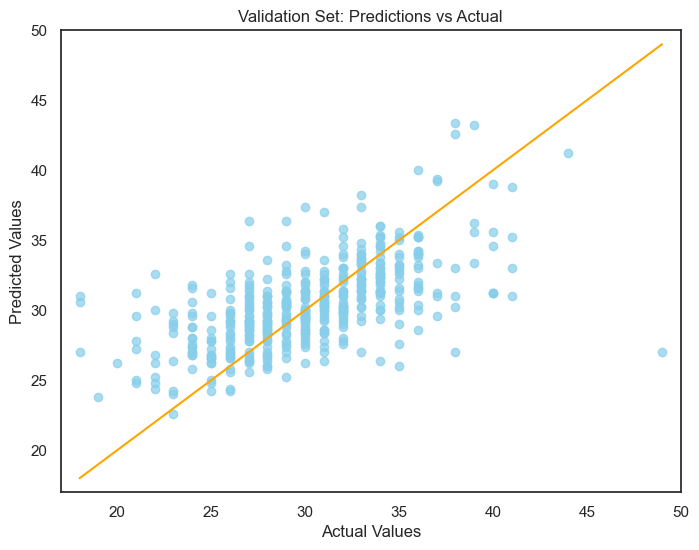

In [15]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

train_preds = knn.predict(X_train)
val_preds = knn.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

In [16]:
knn_2 = KNeighborsRegressor(n_neighbors = 14)
knn_2.fit(X_train, y_train)

train_preds = knn_2.predict(X_train)
val_preds = knn_2.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

train RMSE: 3.1588420770831216
train R²: 0.5304126412414386
Validation RMSE: 3.44353837566635
Validation R²: 0.3918249149676878


Best parameter configuration: {'algorithm': 'auto', 'p': 1}
train RMSE: 3.209119867498577
train R²: 0.5153452796360241
Validation RMSE: 3.42768504744569
Validation R²: 0.39741184575759037


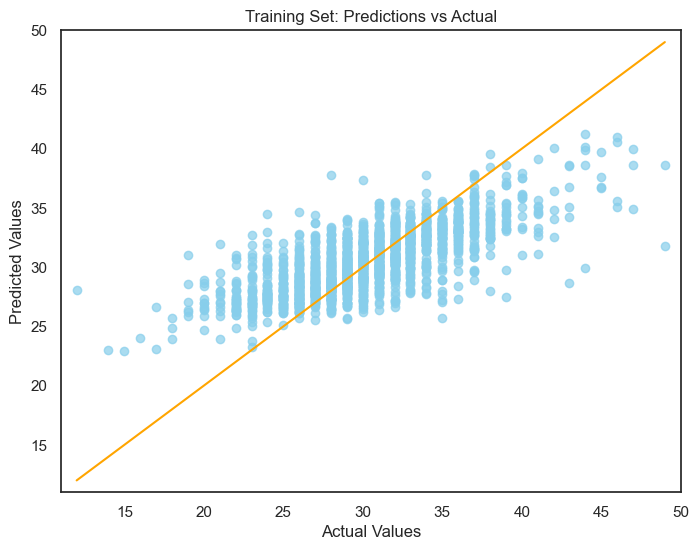

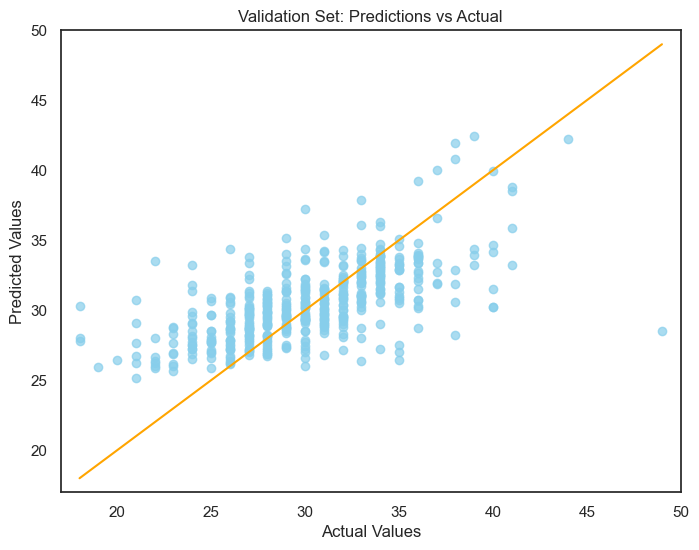

In [17]:

hyperparameters = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2],
}
knn_3 = KNeighborsRegressor(n_neighbors = 20)
gs = GridSearchCV(knn_3, hyperparameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(f'Best parameter configuration: {gs.best_params_}')

train_preds = gs.best_estimator_.predict(X_train)
val_preds = gs.best_estimator_.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

* KNN Regressor has not improved the Linear regression results when achieving the consistent model through hyperparameter tuning.
* Model Parameters such as 'distance' weight or 'brute' algorithm showcased important improvement on training set but a full sign of overfitting when looking to metrics in validation subsets.

### Model Approach 3: Random Forest Regressor

train RMSE: 1.196208056695326
train R²: 0.9326598600231357
Validation RMSE: 3.1791869962140558
Validation R²: 0.4816168017388338


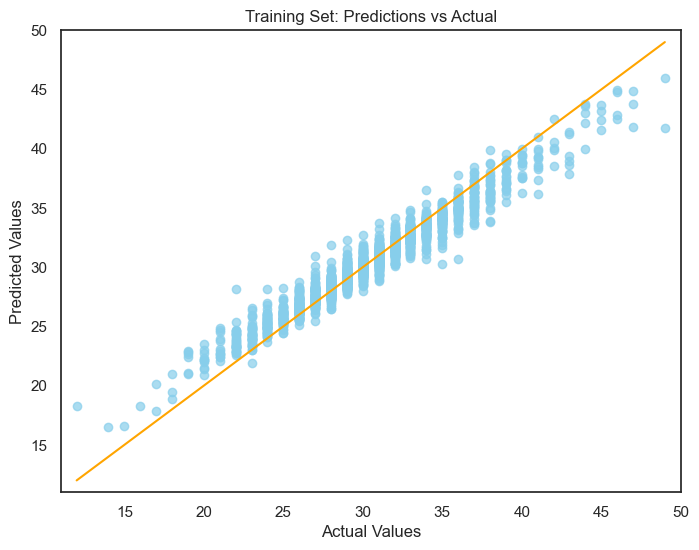

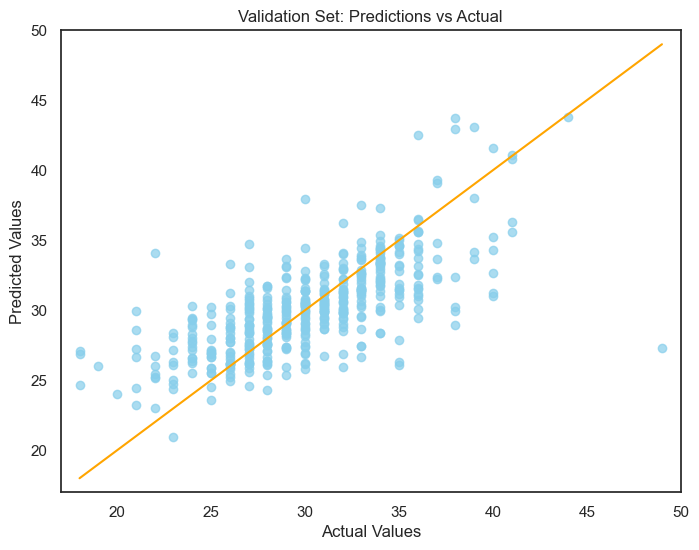

In [18]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

train RMSE: 1.7128094152198774
train R²: 0.8619365722136607
Validation RMSE: 3.1985171399232333
Validation R²: 0.4752938739619411


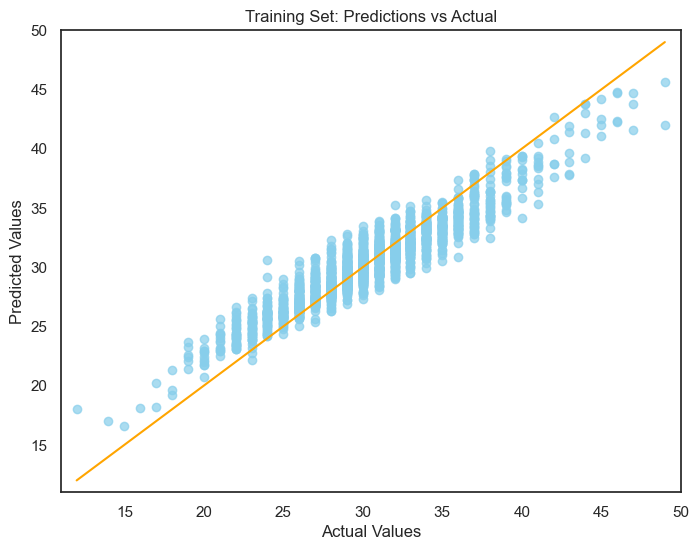

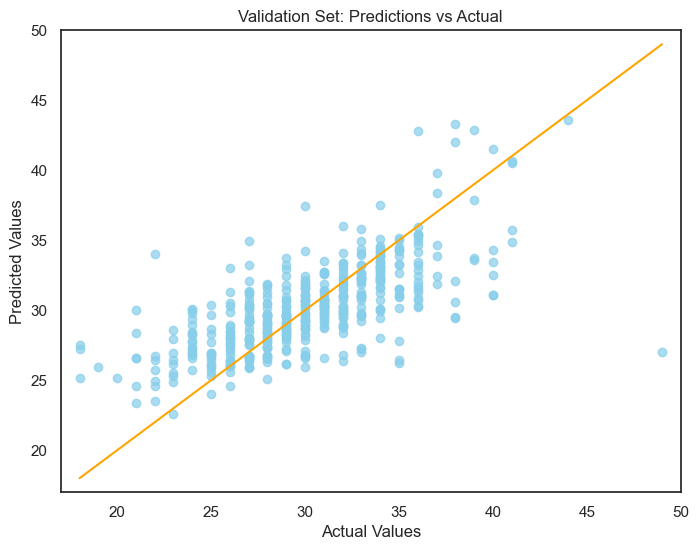

In [19]:
rf2 = RandomForestRegressor(random_state=42, n_estimators=160, max_depth=10, max_features=0.5)
rf2.fit(X_train, y_train)

train_preds = rf2.predict(X_train)
val_preds = rf2.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

Best parameter configuration: {'min_samples_leaf': 5, 'max_features': 0.7000000000000001}
train RMSE: 2.0468258585514336
train R²: 0.8028383888229058
Validation RMSE: 3.199910687015967
Validation R²: 0.4748365608060999


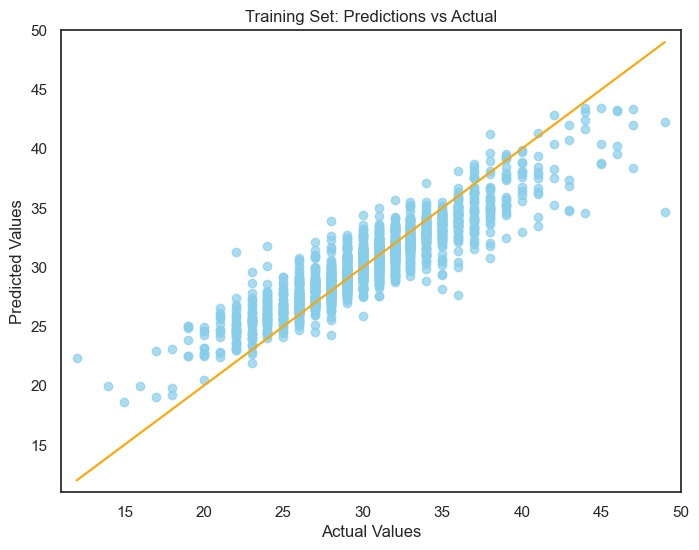

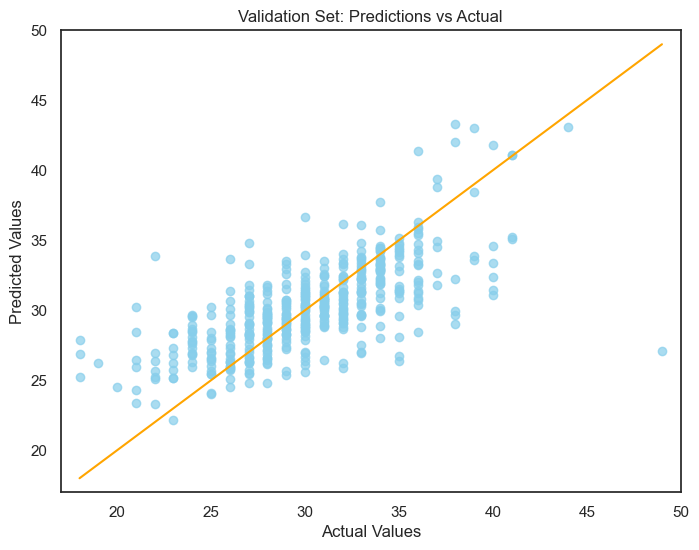

In [20]:
hyperparameters = {
    'min_samples_leaf': np.arange(5, 15, 3),
    'max_features': np.arange(0.1, 0.9, 0.1)
}
rf3 = RandomForestRegressor(random_state=42, n_estimators = 160, max_depth=10)
gs = RandomizedSearchCV(rf3, hyperparameters, cv=10, scoring='neg_mean_squared_error', n_iter=20, random_state=42)
gs.fit(X_train, y_train)

print(f'Best parameter configuration: {gs.best_params_}')

train_preds = gs.best_estimator_.predict(X_train)
val_preds = gs.best_estimator_.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

* Random Forest show better results on training set with a 92% of explained variance. However, it needed a complex hyperparameter tuning to achieve consistency of models.
* The most consistent model do not present better results than the linear regression approach

### Model Approach 4: XGBoost (Gradient Boosting)

train RMSE: 0.13780161238627947
train R²: 0.9991063475608826
Validation RMSE: 3.054213461585563
Validation R²: 0.5215709209442139


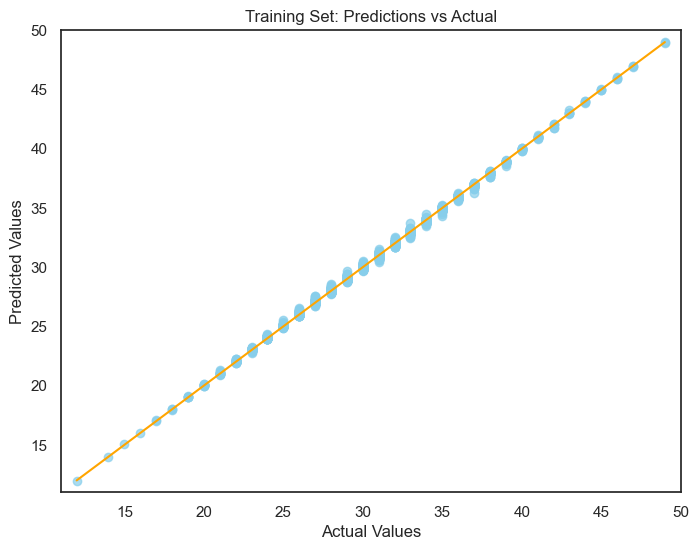

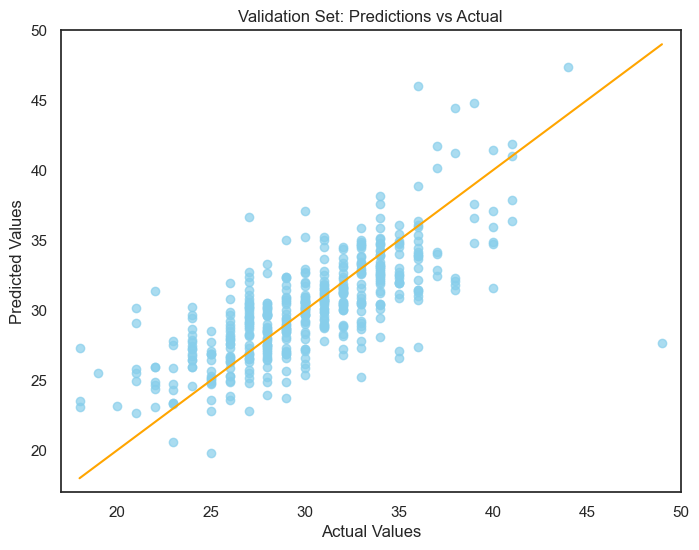

In [21]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

train_preds = xgb_reg.predict(X_train)
val_preds = xgb_reg.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

In [22]:
xgb_reg = XGBRegressor(n_estimators=60)
xgb_reg.fit(X_train, y_train)

train_preds = xgb_reg.predict(X_train)
val_preds = xgb_reg.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

train RMSE: 0.3808548154862619
train R²: 0.9931737780570984
Validation RMSE: 3.079174394642558
Validation R²: 0.5137189030647278


In [23]:
param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
    'gamma': [0, 1, 2]
}

xgb_reg = XGBRegressor(min_child_weight=5, colsample_bytree=1, subsample=1)

gs = GridSearchCV(xgb_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)


train_preds = gs.best_estimator_.predict(X_train)
val_preds = gs.best_estimator_.predict(X_val)


print('Best Parameters:', gs.best_params_)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

Best Parameters: {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
train RMSE: 1.1488866367579509
train R²: 0.9378823637962341
Validation RMSE: 2.709325952100909
Validation R²: 0.6235204935073853


train RMSE: 1.1488866367579509
train R²: 0.9378823637962341
Validation RMSE: 2.709325952100909
Validation R²: 0.6235204935073853


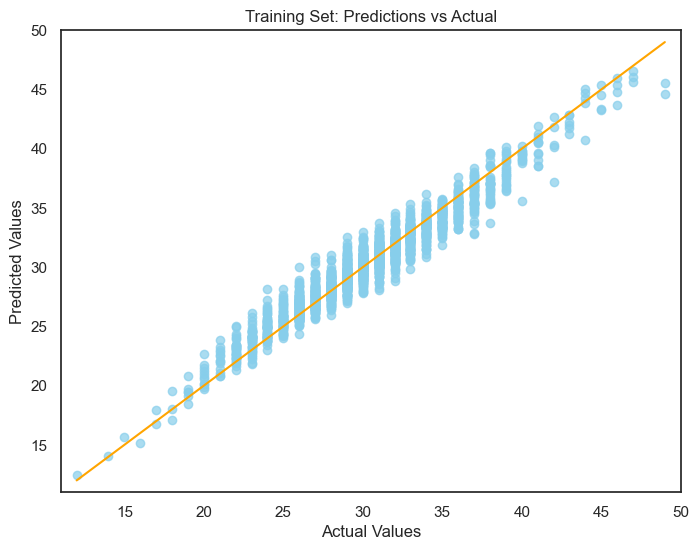

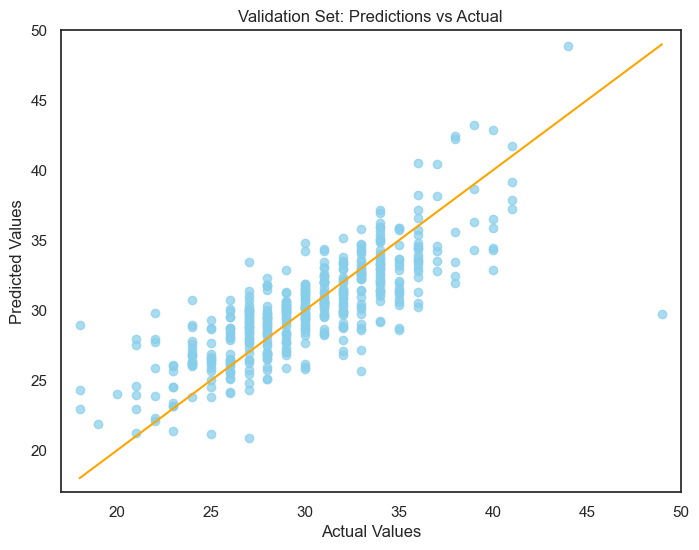

In [24]:

xgb_reg_2 = XGBRegressor(colsample_bytree=1, gamma=1, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1)
xgb_reg_2.fit(X_train, y_train)

train_preds = xgb_reg_2.predict(X_train)
val_preds = xgb_reg_2.predict(X_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

plot_predictions_vs_actual(y_train, train_preds, 'Training Set: Predictions vs Actual')

plot_predictions_vs_actual(y_val, val_preds, 'Validation Set: Predictions vs Actual')

* XGBoost presented one of the best approaches with a bunch of hyperparameters that could enhance models performance. Some of the parameters were examined to get a consistent model , but because of the limited knowledge of the model, best metrics cannot be achieved.

### Analysis from different feature set transformations

Considering that each model trained present similar results and gap between training and validation, the process was repeated but using different transformation of features based on the preprocessing notebook. Each stage below present the best model for that preprocessing and feature engineering stage.

The best feature set obtained is the original dataset with outlier and missing values handling as well as preprocessing using encoding and standard scaling.

Analysis from different transformations:

* Features_1_T - > Linear Regression -> Train: 2.25 - 0.76 Validation: 2.34 - 0.71
* Features_2_Correlation -> Random Forest -> Train: 2.51 - 0.70 Validation: 3.31 - 0.43
* Features_3_Polynomial -> Random Forest -> Train: 2.15 - 0.78 Validation: 3.36 - 0.41
* Features_4_VIFReduced -> KNN -> Train: 3.16 - 0.52 Validation: 3.33 - 0.42
* Features_5_RFESelection -> KNN -> Train: 3.14 - 0.53 Validation: 3.31 - 0.43
* Features_6_FinalPCASelection -> KNN -> Train: 3.08 - 0.55 Validation: 3.34 - 0.42

In [25]:
#Cross val scores Generation
def generate_cross_val_scores(model, X, y):
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = (-cv_scores)**0.5
    return rmse_scores

#### Best Model Stage 1

In [26]:
X_st1 = pd.read_csv('../data/Features_1_T.csv')
X_st1_data, X_st1_test, y_data, y_test = train_test_split(X_st1, y, test_size=0.2, random_state=42)

X_st1_train, X_st1_val, y_train, y_val = train_test_split(X_st1_data, y_data, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_st1_train, y_train)

train_preds = lr.predict(X_st1_train)
val_preds = lr.predict(X_st1_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st1 = generate_cross_val_scores(lr, X_st1_val, y_val)
cv_st1_train = generate_cross_val_scores(lr, X_st1_train, y_train)
print(cv_st1)
print(cv_st1_train)

train RMSE: 2.2548488215680282
train R²: 0.7607260453514287
Validation RMSE: 2.3435580205343154
Validation R²: 0.7183108040919468
[ 2.56392432  3.09290422  2.71420443  1.65263727  1.89074816 21.72852688
  2.37911523  2.36757667  3.38845045  2.30442919]
[2.04049769 2.33178821 2.77766895 2.51602724 2.37865206 2.08180602
 2.56899519 2.16533414 2.09657676 2.30192098]


#### Best Model Stage 2

In [27]:
X_st2 = pd.read_csv('../data/Features_2_Correlation.csv')
X_st2_data, X_st2_test, y_data, y_test = train_test_split(X_st2, y, test_size=0.2, random_state=42)

X_st2_train, X_st2_val, y_train, y_val = train_test_split(X_st2_data, y_data, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42, n_estimators=160, max_depth=10, min_samples_leaf=8, max_features=0.7)
rf.fit(X_st2_train, y_train)

train_preds = rf.predict(X_st2_train)
val_preds = rf.predict(X_st2_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st2 = generate_cross_val_scores(rf, X_st2_val, y_val)
cv_st2_train = generate_cross_val_scores(rf, X_st2_train, y_train)
print(cv_st2)
print(cv_st2_train)

train RMSE: 2.5178480829127703
train R²: 0.7016544157116007
Validation RMSE: 3.3134434873625516
Validation R²: 0.43690988193681346
[2.99661571 4.8980465  3.87166425 2.00269387 2.77108837 2.75614037
 3.47593088 3.63904009 3.06025727 3.42216772]
[2.96622418 3.36497926 3.6472735  3.25561488 3.10360565 3.04469623
 3.70607624 3.03082456 2.98864236 3.17150625]


#### Best Model Stage 3

In [28]:
X_st3 = pd.read_csv('../data/Features_3_Polynomial.csv')
X_st3_data, X_st3_test, y_data, y_test = train_test_split(X_st3, y, test_size=0.2, random_state=42)

X_st3_train, X_st3_val, y_train, y_val = train_test_split(X_st3_data, y_data, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42, n_estimators=160, max_depth=10, min_samples_leaf=5, max_features=0.4)
rf.fit(X_st3_train, y_train)

train_preds = rf.predict(X_st3_train)
val_preds = rf.predict(X_st3_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st3 = generate_cross_val_scores(rf, X_st3_val, y_val)
cv_st3_train = generate_cross_val_scores(rf, X_st3_train, y_train)
print(cv_st3)
print(cv_st3_train)

train RMSE: 2.1534139962846304
train R²: 0.7817694076783577
Validation RMSE: 3.3699381788438285
Validation R²: 0.41754465127326534
[3.02310608 4.96998385 3.91236162 2.16997612 2.94861382 2.77286882
 3.47334204 3.71530319 3.1996684  3.30758787]
[2.99895222 3.34299407 3.65910957 3.20321174 3.08176022 3.09400643
 3.72199211 3.08759686 2.97021136 3.12549057]


#### Best Model stage 4

In [29]:
X_st4 = pd.read_csv('../data/Features_4_VIFReduced.csv')
X_st4_data, X_st4_test, y_data, y_test = train_test_split(X_st4, y, test_size=0.2, random_state=42)

X_st4_train, X_st4_val, y_train, y_val = train_test_split(X_st4_data, y_data, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_st4_train, y_train)

train_preds = knn.predict(X_st4_train)
val_preds = knn.predict(X_st4_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st4 = generate_cross_val_scores(knn, X_st4_val, y_val)
cv_st4_train = generate_cross_val_scores(knn, X_st4_train, y_train)
print(cv_st4)
print(cv_st4_train)

train RMSE: 3.1631960730792685
train R²: 0.5291172358325335
Validation RMSE: 3.3395230603641566
Validation R²: 0.42801101759476134
[3.18042541 4.86046231 3.96911516 2.38351542 3.04175249 2.85500083
 3.47500148 3.80489647 3.57433408 3.67613531]
[2.98524454 3.55132865 3.54352608 3.55034382 3.22667858 3.19335238
 3.74512335 3.22539291 3.13204211 3.32530865]


#### Best Model Stage 5

In [30]:
X_st5 = pd.read_csv('../data/Features_5_RFESelection.csv')
X_st5_data, X_st5_test, y_data, y_test = train_test_split(X_st5, y, test_size=0.2, random_state=42)

X_st5_train, X_st5_val, y_train, y_val = train_test_split(X_st5_data, y_data, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_st5_train, y_train)

train_preds = knn.predict(X_st5_train)
val_preds = knn.predict(X_st5_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st5 = generate_cross_val_scores(knn, X_st5_val, y_val)
cv_st5_train = generate_cross_val_scores(knn, X_st5_train, y_train)
print(cv_st5)
print(cv_st5_train)

train RMSE: 3.1464366265546184
train R²: 0.5340937393934131
Validation RMSE: 3.3160975909581767
Validation R²: 0.4360074382598702
[3.19485124 4.78231449 3.87195316 2.28054911 3.09007    2.72260066
 3.34996755 3.71623202 3.47891162 3.6079848 ]
[2.99827683 3.45584086 3.58641016 3.52911443 3.14004648 3.11301974
 3.77282782 3.24168792 3.07577501 3.3251397 ]


#### Best Model Stage 6

In [31]:
X_st6 = pd.read_csv('../data/Features_6_FinalPCASelection.csv')
X_st6_data, X_st6_test, y_data, y_test = train_test_split(X_st6, y, test_size=0.2, random_state=42)

X_st6_train, X_st6_val, y_train, y_val = train_test_split(X_st6_data, y_data, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(X_st6_train, y_train)

train_preds = knn.predict(X_st6_train)
val_preds = knn.predict(X_st6_val)

print(f'train RMSE: {rmse(y_train, train_preds)}')
print(f'train R²: {r2_score(y_train, train_preds)}')
print(f'Validation RMSE: {rmse(y_val, val_preds)}')
print(f'Validation R²: {r2_score(y_val, val_preds)}')

cv_st6 = generate_cross_val_scores(knn, X_st6_val, y_val)
cv_st6_train = generate_cross_val_scores(knn, X_st6_train, y_train)
print(cv_st6)
print(cv_st6_train)

train RMSE: 3.088143278156339
train R²: 0.5511973092594894
Validation RMSE: 3.3465517218719287
Validation R²: 0.42560076461454766
[3.38296029 4.66741227 4.10090381 2.4702529  3.14296301 2.7222016
 3.55818975 3.77106624 3.57923061 3.50315171]
[3.12723039 3.39879624 3.62506062 3.50365816 3.18533509 3.16177179
 3.74312755 3.31548124 3.00208146 3.28318267]


#### Comparison between best possible features selection

In [32]:
rmse_models_cvval = pd.DataFrame({
    'Stage1': cv_st1,
    'Stage2': cv_st2,
    'Stage3': cv_st3,
    'Stage4': cv_st4,
    'Stage5': cv_st5,
    'Stage6': cv_st6
})

rmse_models_cvtrain = pd.DataFrame({
    'Stage1': cv_st1_train,
    'Stage2': cv_st2_train,
    'Stage3': cv_st3_train,
    'Stage4': cv_st4_train,
    'Stage5': cv_st5_train,
    'Stage6': cv_st6_train
})

##### Training CV Scores Analysis

In [33]:
models_rmse_anova_result = stats.f_oneway(cv_st1_train, cv_st2_train, cv_st3_train, cv_st4_train, cv_st5_train, cv_st6_train)
print('Can you reject NHo?')
print('yes' if models_rmse_anova_result.pvalue < 0.05 else 'no')

Can you reject NHo?
yes


In [34]:
rmse_models_cvtrain.describe()

,Stage1,Stage2,Stage3,Stage4,Stage5,Stage6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.325927,3.227944,3.228533,3.347834,3.323814,3.334573
std,0.240864,0.266841,0.265036,0.238196,0.254427,0.233974
min,2.040498,2.966224,2.970211,2.985245,2.998277,3.002081
25%,2.113766,3.034292,3.083219,3.201363,3.119776,3.167663
50%,2.316855,3.137556,3.109749,3.275994,3.283414,3.299332
75%,2.481683,3.337638,3.308048,3.548639,3.510796,3.477443
max,2.777669,3.706076,3.721992,3.745123,3.772828,3.743128


In [35]:
stage1_and_stage2_comparison = stats.ttest_rel(cv_st1_train, cv_st2_train)
print('Can you reject NHo?')
print('yes' if stage1_and_stage2_comparison.pvalue < 0.05 else 'no')

Can you reject NHo?
yes


### Testing Best model with testing data


In [36]:
lr = LinearRegression()
lr.fit(X_st1_train, y_train)

test_preds = lr.predict(X_st1_test)

print(f'Test RMSE: {rmse(y_test, test_preds)}')
print(f'Test R²: {r2_score(y_test, test_preds)}')

Test RMSE: 2.1153536708356677
Test R²: 0.793172320053353


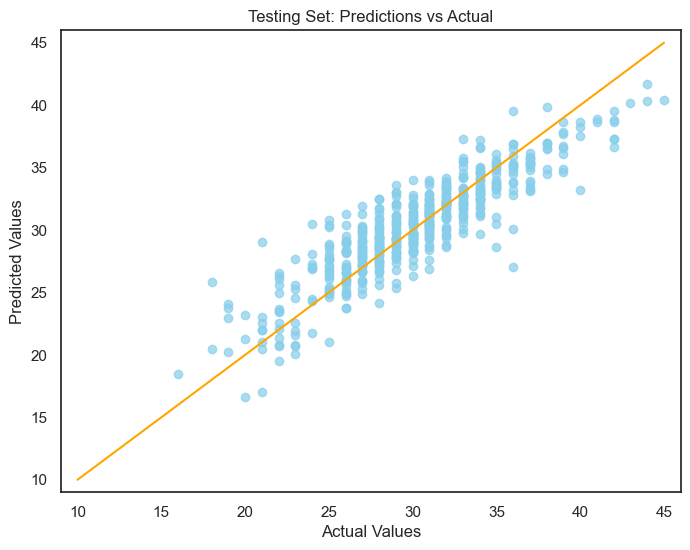

In [37]:
plot_predictions_vs_actual(y_test, test_preds, 'Testing Set: Predictions vs Actual')

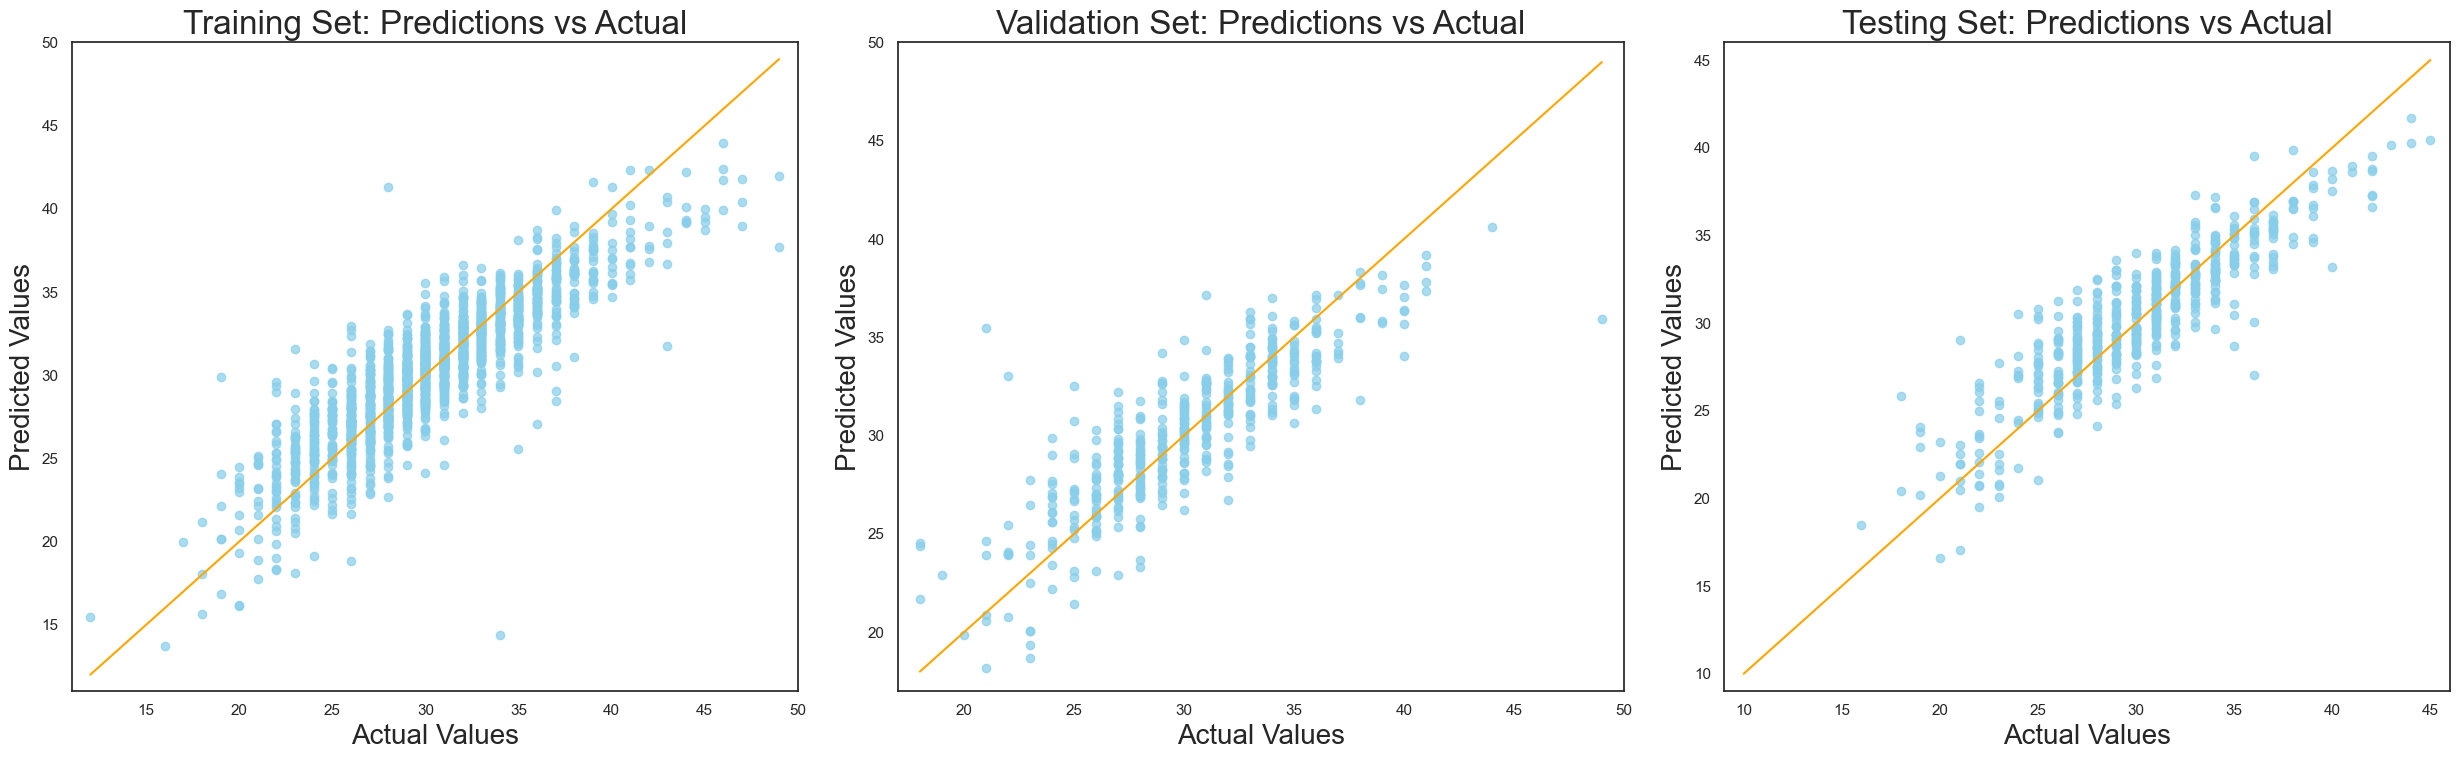

In [38]:
#Joining plots in one graph
fig, axis = plt.subplots(1, 3, figsize = (25, 8))
plt.rcParams.update({'font.size': 20})

#TRAINING
train_preds = lr.predict(X_train)
y_true = np.array(y_train)
y_pred = np.array(train_preds)

plt.subplot(1, 3, 1)
plt.scatter(y_true, y_pred, alpha=0.7, color='skyblue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='orange', linestyle='-')  # Diagonal line
plt.title('Training Set: Predictions vs Actual', fontsize=24)
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.xlim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.ylim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.grid(False)

#VALIDATION
val_preds = lr.predict(X_val)
y_true = np.array(y_val)
y_pred = np.array(val_preds)

plt.subplot(1, 3, 2)
plt.scatter(y_true, y_pred, alpha=0.7, color='skyblue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='orange', linestyle='-')  # Diagonal line
plt.title('Validation Set: Predictions vs Actual', fontsize=24)
plt.xlabel('Actual Values',fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.xlim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.ylim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.grid(False)

## TESTING
y_true = np.array(y_test)
y_pred = np.array(test_preds)

plt.subplot(1, 3, 3)
plt.scatter(y_true, y_pred, alpha=0.7, color='skyblue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='orange', linestyle='-')  # Diagonal line
plt.title('Testing Set: Predictions vs Actual', fontsize=24)
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.xlim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.ylim(y_true.min() - 1, y_true.max() + 1)  # Set limits
plt.grid(False)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=200)
plt.show()

### Final Consideration

Various approaches were assessed, including linear models and tree-based models, to forecast cancer mortality rates.

The differences among the model approaches were minimal. Consequently, a thorough analysis of the feature engineering and selection phases was performed.

When examining the outcomes of the top model for each feature set, a notable difference was identified (using the ANOVA p-value). A subsequent statistical test comparing the leading two models confirmed a significant distinction between them, facilitating the choice of the best model. Thus, the optimal feature set comes from Stage 1 of the feature engineering process, which involves only data cleaning, encoding, and scaling, and comprises 31 features.

The top model associated with this feature set is linear regression, which consistently achieved better RMSE scores and showed a reasonable improvement compared to other methods that exhibited clear signs of overfitting.

The best results produced an RMSE of around 2.3, suggesting that, based on the current predictions for the annual mortality rate per capita, we are only missing two cases.